In [73]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [74]:
# Load sales data
sales = pd.read_excel("data/neueFische_Umsaetze_Baeckerei.xlsx")
# Load and add Corona data
corona = pd.read_excel("data/corona-measures-vienna.xlsx")
#restrict_dates = pd.DataFrame(corona.date[corona.main_measures2 != "relax"].unique())
#relax_dates = pd.DataFrame(corona.date[corona.main_measures2 == "relax"].unique())
corona_sales = sales[sales.Date > "2018-01-01"]

In [75]:
# broadcast lockdown times
measures = pd.DataFrame(corona[corona.main_measures2 != "-"])
corona_sales["lock"] = False
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2020-03-10")) & (corona_sales.Date < pd.to_datetime("2020-04-14"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2020-11-03")) & (corona_sales.Date < pd.to_datetime("2020-11-17"))] = "lockdown_light"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2020-11-17")) & (corona_sales.Date < pd.to_datetime("2020-12-06"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2020-12-26")) & (corona_sales.Date < pd.to_datetime("2021-02-07"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2021-04-01")) & (corona_sales.Date < pd.to_datetime("2021-05-02"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2021-11-08")) & (corona_sales.Date < pd.to_datetime("2021-12-31"))] = "lockdown"

/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/60535755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_sales["lock"] = False
/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/60535755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2020-03-10")) & (corona_sales.Date < pd.to_datetime("2020-04-14"))] = "lockdown"
/Users/burkhardtflemer/Desktop/neuefische/meteo-bakery/.venv/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A val

In [76]:
# get dates two years before to better visualize the effect
import datetime
years = 2
days_per_year = 365
two_years_before = datetime.timedelta(days=(years*days_per_year))

corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-03-10")) & (corona_sales.Date < pd.to_datetime("2018-04-14"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-11-03")) & (corona_sales.Date < pd.to_datetime("2018-11-17"))] = "lockdown_light"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-11-17")) & (corona_sales.Date < pd.to_datetime("2018-12-06"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-12-26")) & (corona_sales.Date < pd.to_datetime("2019-02-07"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2019-04-01")) & (corona_sales.Date < pd.to_datetime("2019-05-02"))] = "lockdown"
corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2019-11-08")) & (corona_sales.Date < pd.to_datetime("2019-12-31"))] = "lockdown"

/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/2620524901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-03-10")) & (corona_sales.Date < pd.to_datetime("2018-04-14"))] = "lockdown"
/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/2620524901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_sales["lock"][(corona_sales.Date >= pd.to_datetime("2018-11-03")) & (corona_sales.Date < pd.to_datetime("2018-11-17"))] = "lockdown_light"
/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/2620524901.py:9: Se

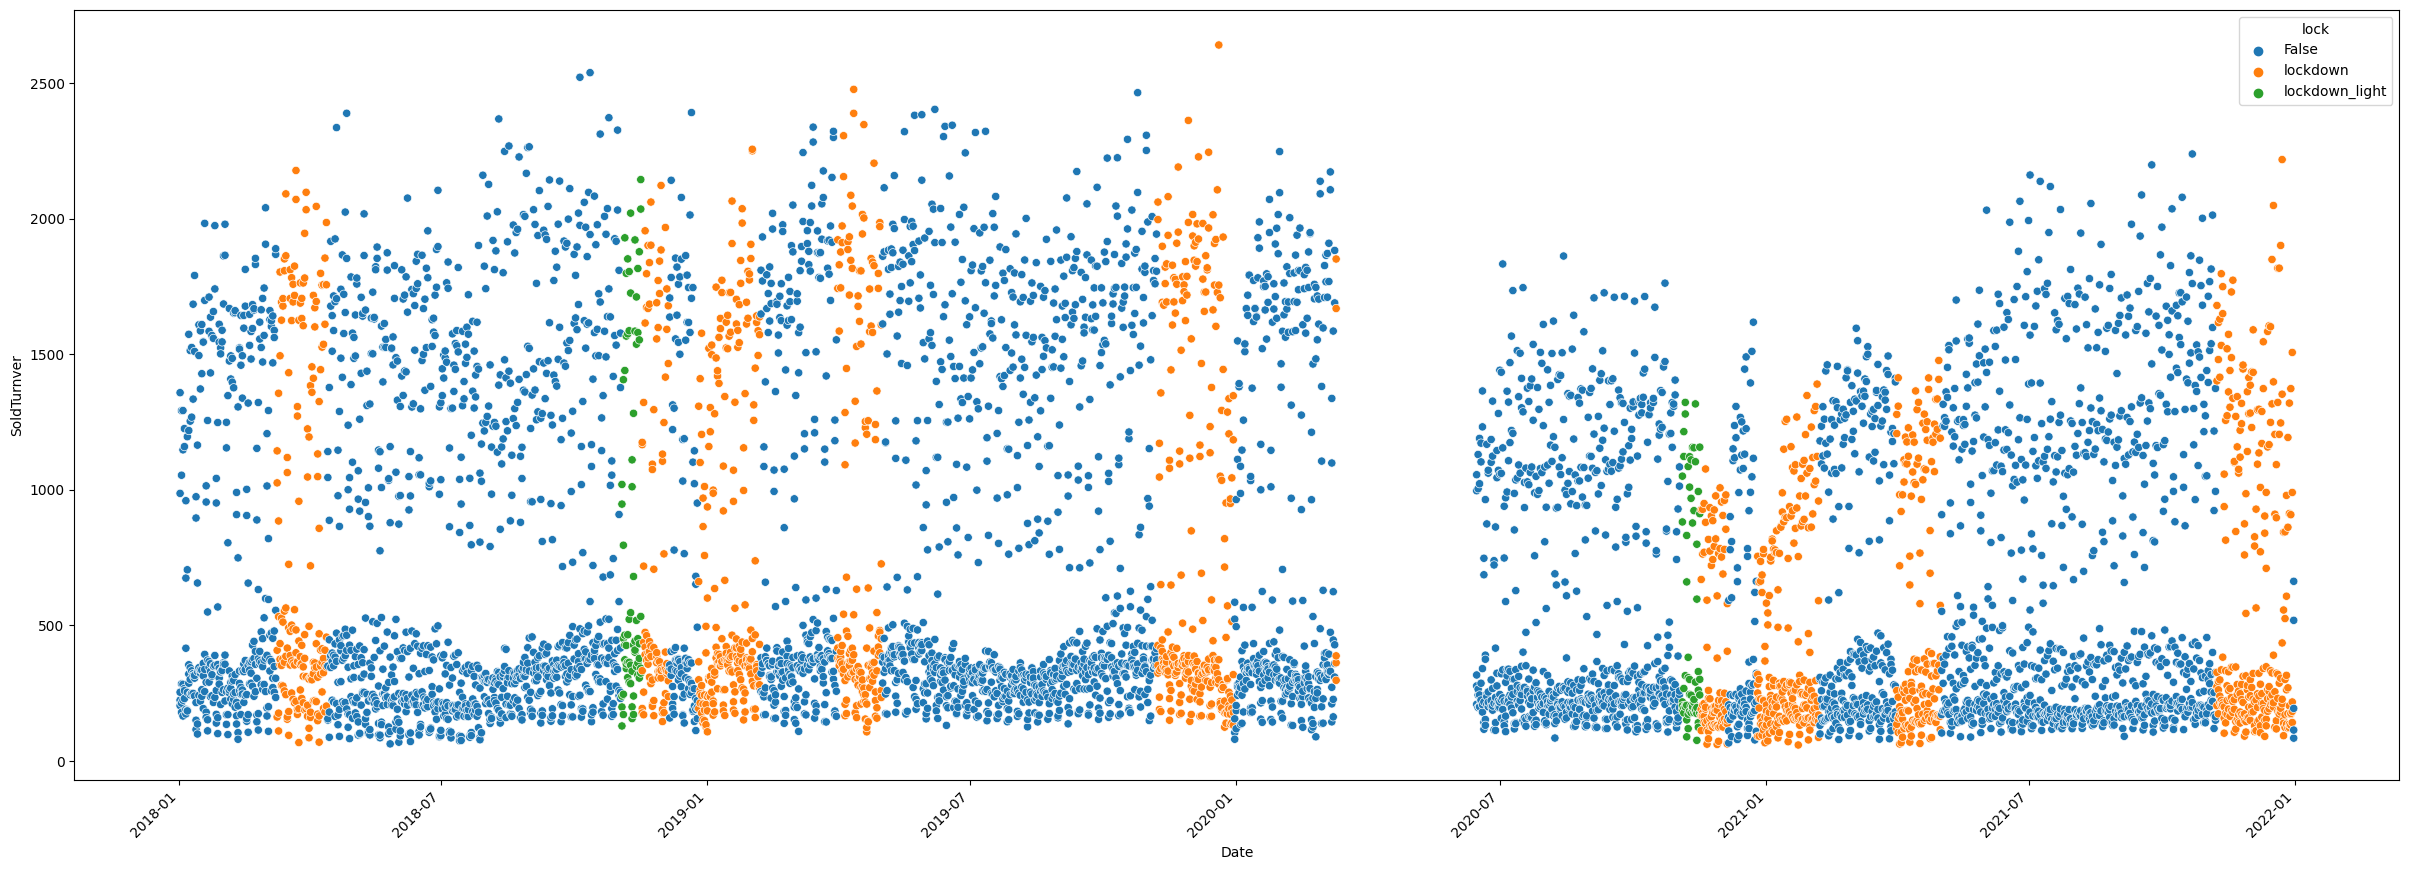

In [77]:
# Plot restrictions, branch 1
plt.figure(figsize = (30, 10))
sns.scatterplot(data = corona_sales[corona_sales.Branch == 1], x = "Date", y = "SoldTurnver", hue = "lock")
plt.xticks(rotation = 45, horizontalalignment = "right");
plt.savefig("plots/corona.branch1.png")

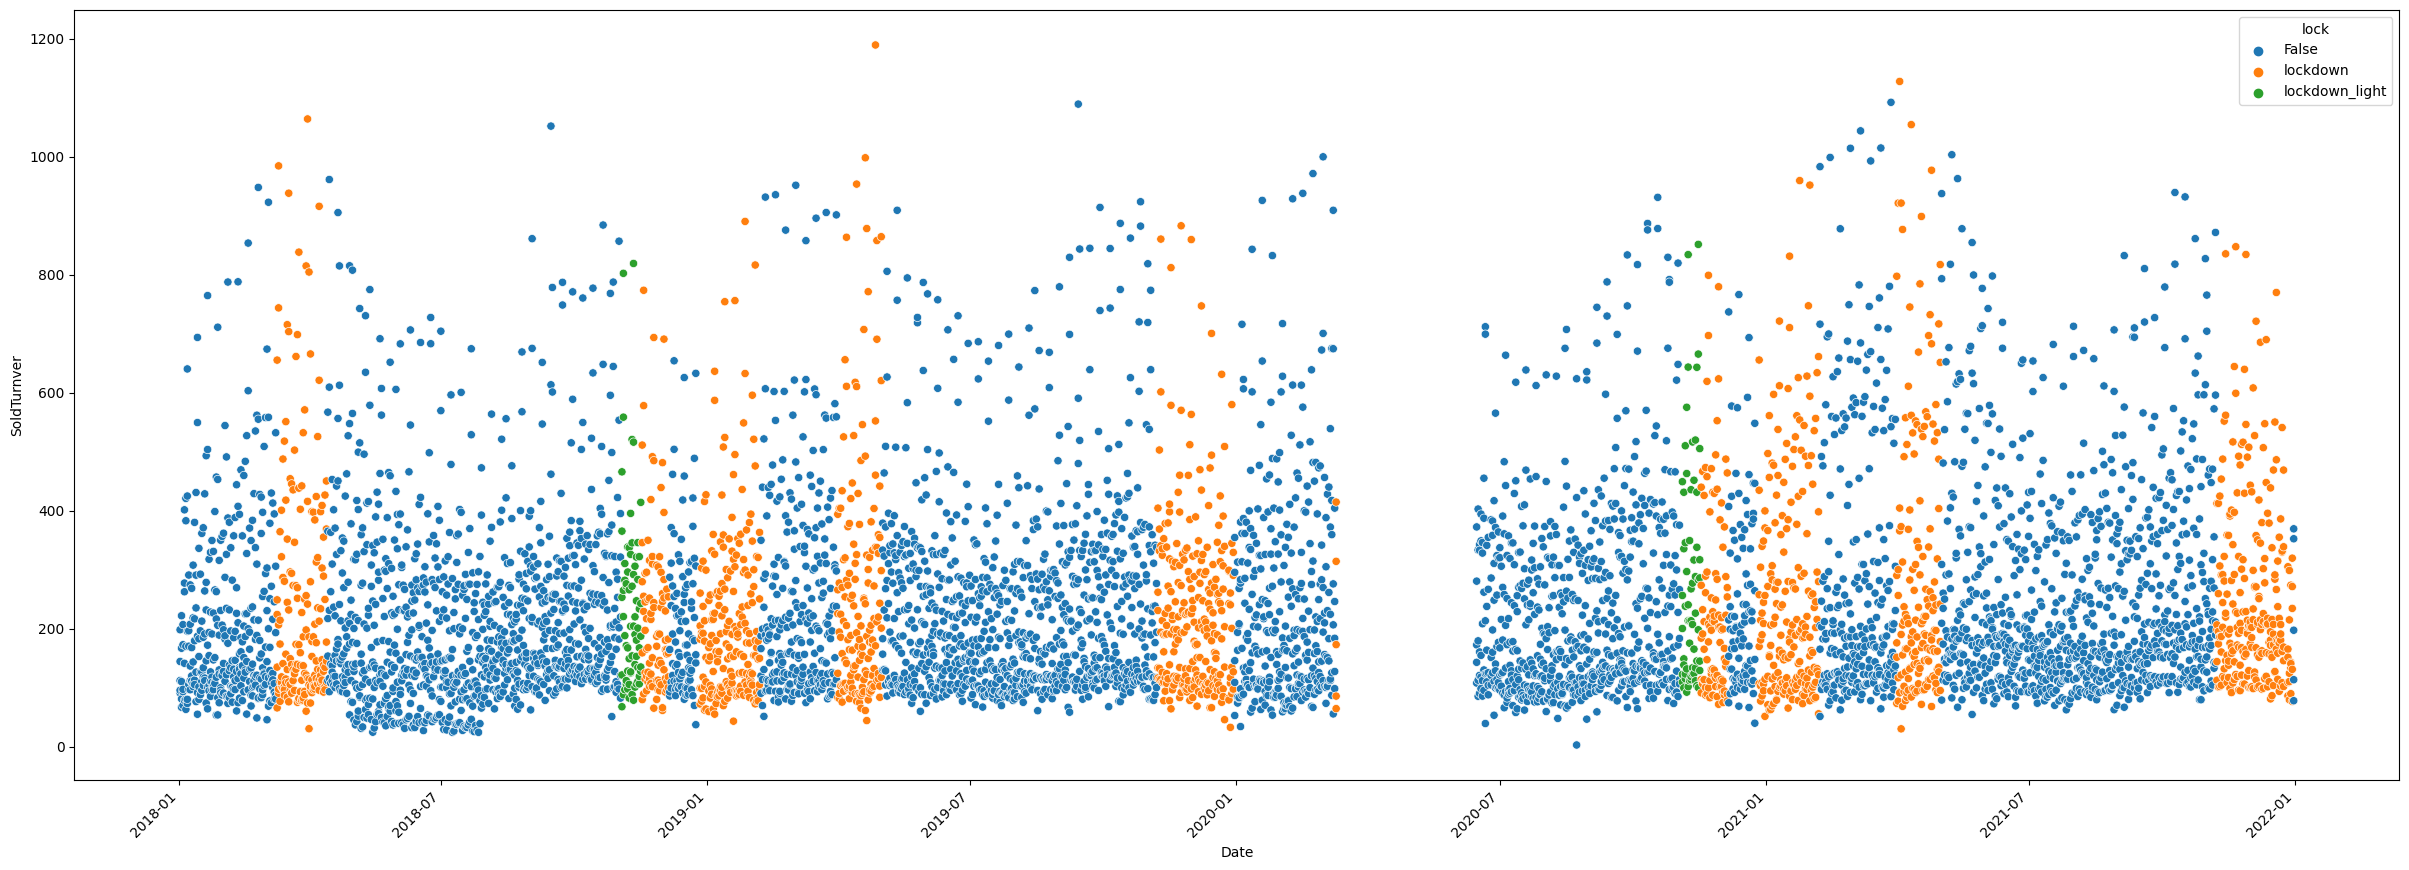

In [78]:
# Plot restrictions, branch 2
plt.figure(figsize = (30, 10))
sns.scatterplot(data = corona_sales[corona_sales.Branch == 2], x = "Date", y = "SoldTurnver", hue = "lock")
plt.xticks(rotation = 45, horizontalalignment = "right");
plt.savefig("plots/corona.branch1.png")

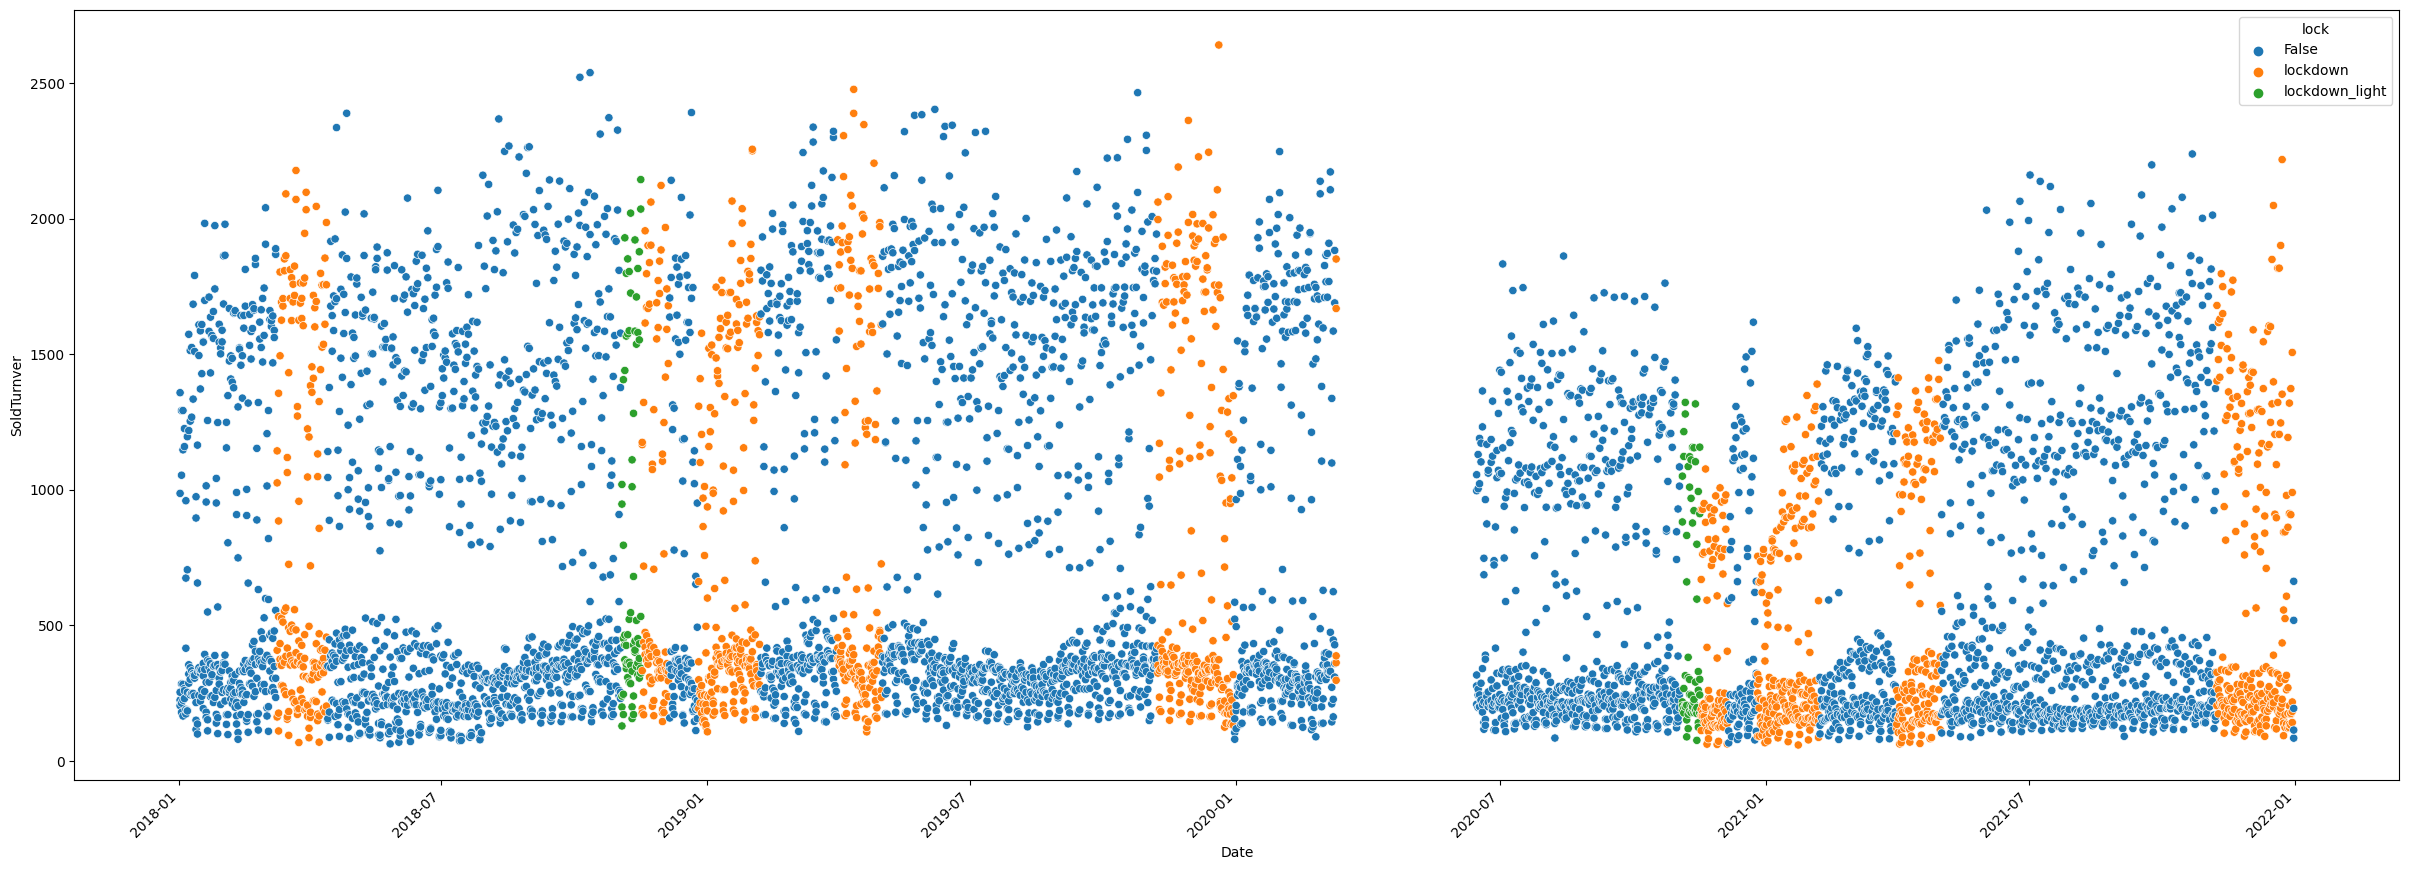

In [79]:
# Plot restrictions, branch 3
plt.figure(figsize = (30, 10))
sns.scatterplot(data = corona_sales[corona_sales.Branch == 1], x = "Date", y = "SoldTurnver", hue = "lock")
plt.xticks(rotation = 45, horizontalalignment = "right");
plt.savefig("plots/corona.branch1.png")

In [80]:
# holidays
# school holidays from https://www.schulferien.org/oesterreich/ferien/2012/
school_hols = pd.read_excel("data/school_holidays.xlsx")
# public holidays from google search "Feiertage Wien 'YEAR'"
public_hols = pd.read_excel("data/public_holidays.xlsx")
public_hols.Date = pd.to_datetime(public_hols.Date)

# create true/false column in sales data
sales["school_holiday"] = sales["Date"].isin(school_hols["Date"])
sales["public_holiday"] = sales["Date"].isin(public_hols["Date"])


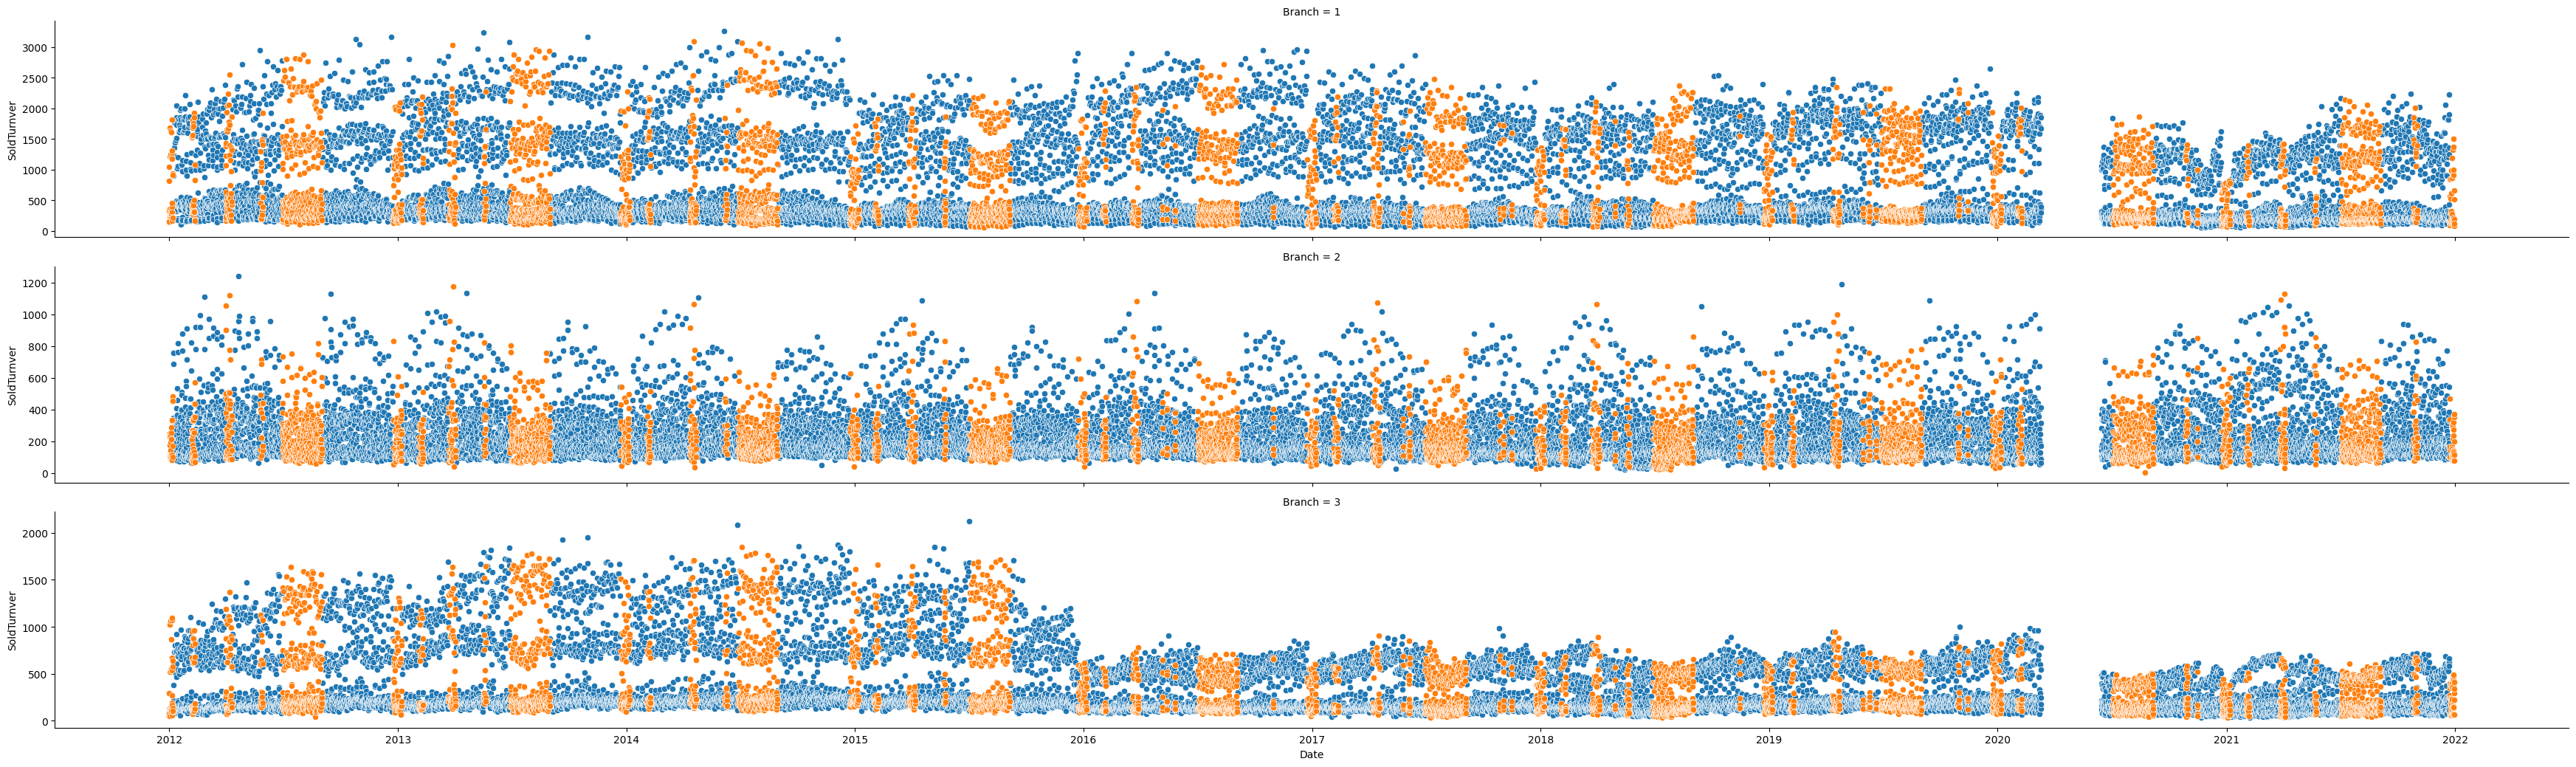

In [81]:
# plot with colours for school holidays
g = sns.FacetGrid(data=sales, row="Branch", hue="school_holiday", sharey=False, height=3.5, aspect=10)
g.map(sns.scatterplot, "Date",  "SoldTurnver")
plt.savefig('plots/sales.school_holidays.png');


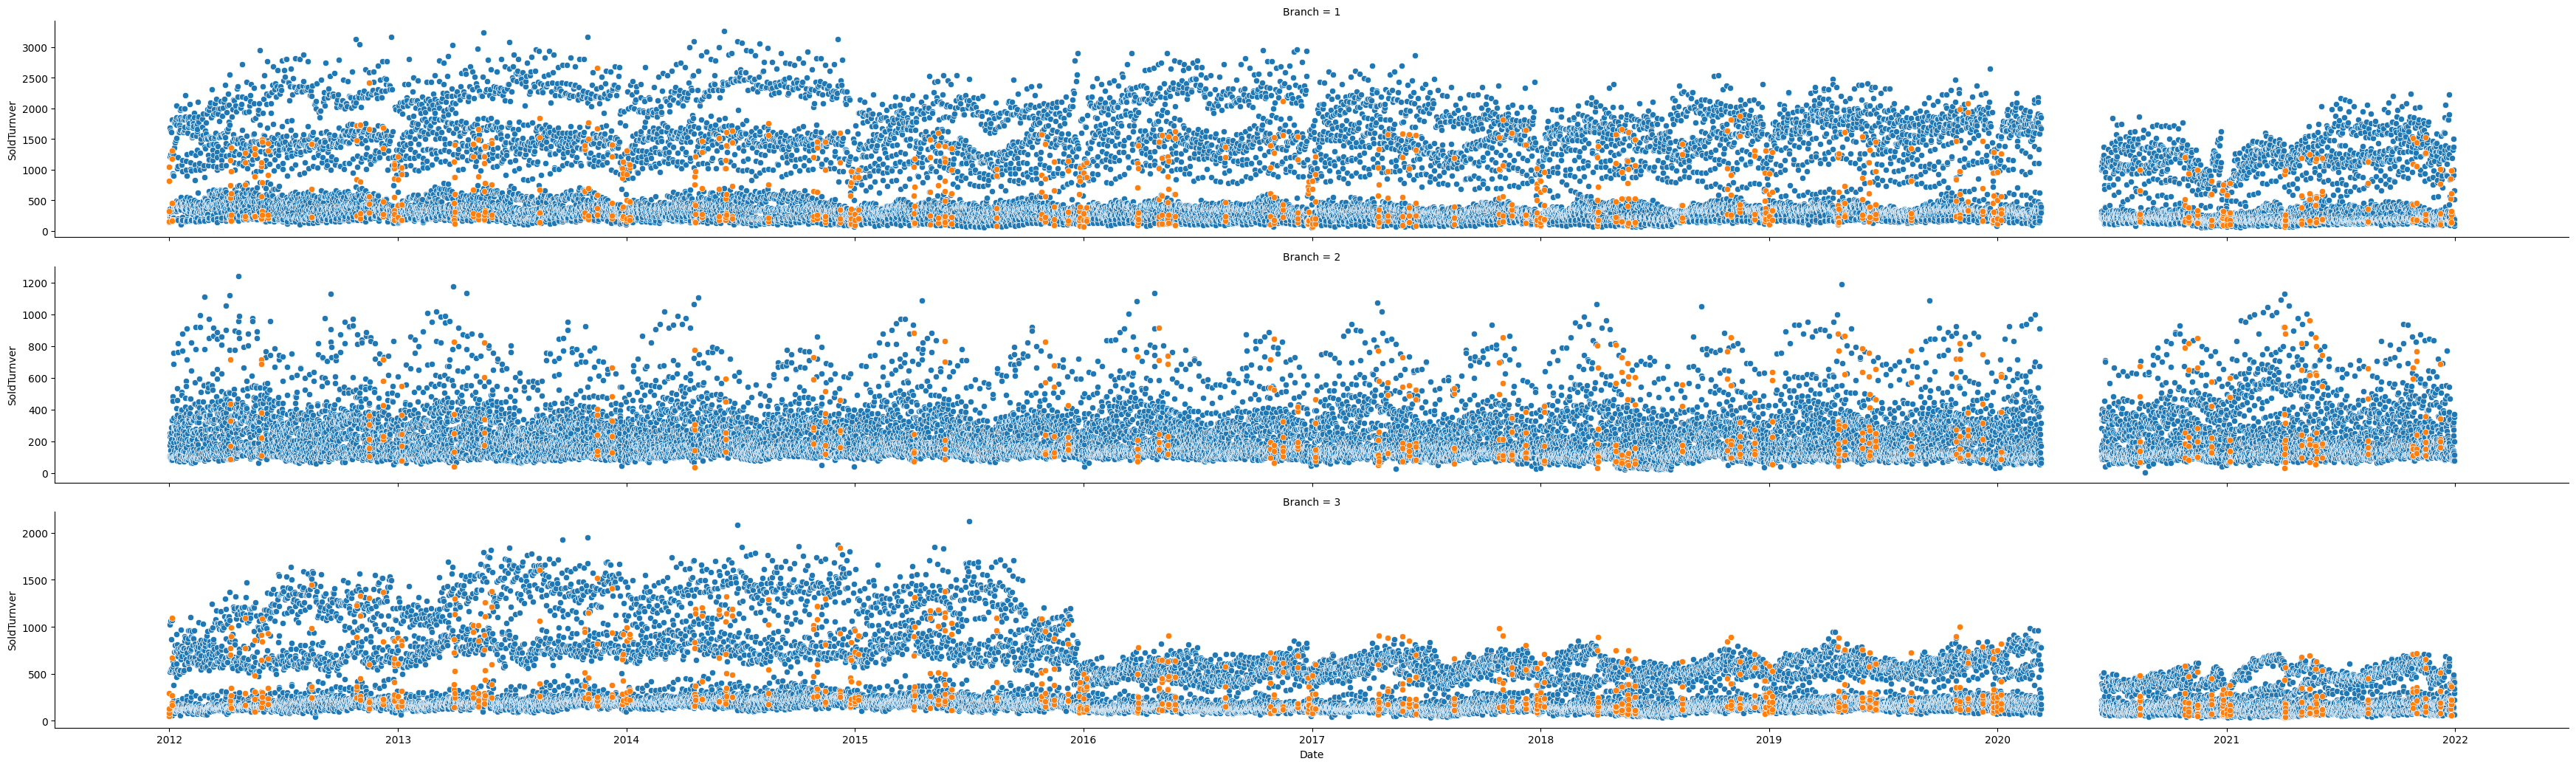

In [82]:
# plot with colours for public holidays
g = sns.FacetGrid(data=sales, row="Branch", hue="public_holiday", sharey=False, height=3.5, aspect=10)
g.map(sns.scatterplot, "Date",  "SoldTurnver")
plt.savefig('plots/sales.school_holidays.png');

In [83]:
# dataframe with sum of sales per day
daily_sales = sales.groupby(["Branch", "Date"]).sum().reset_index()

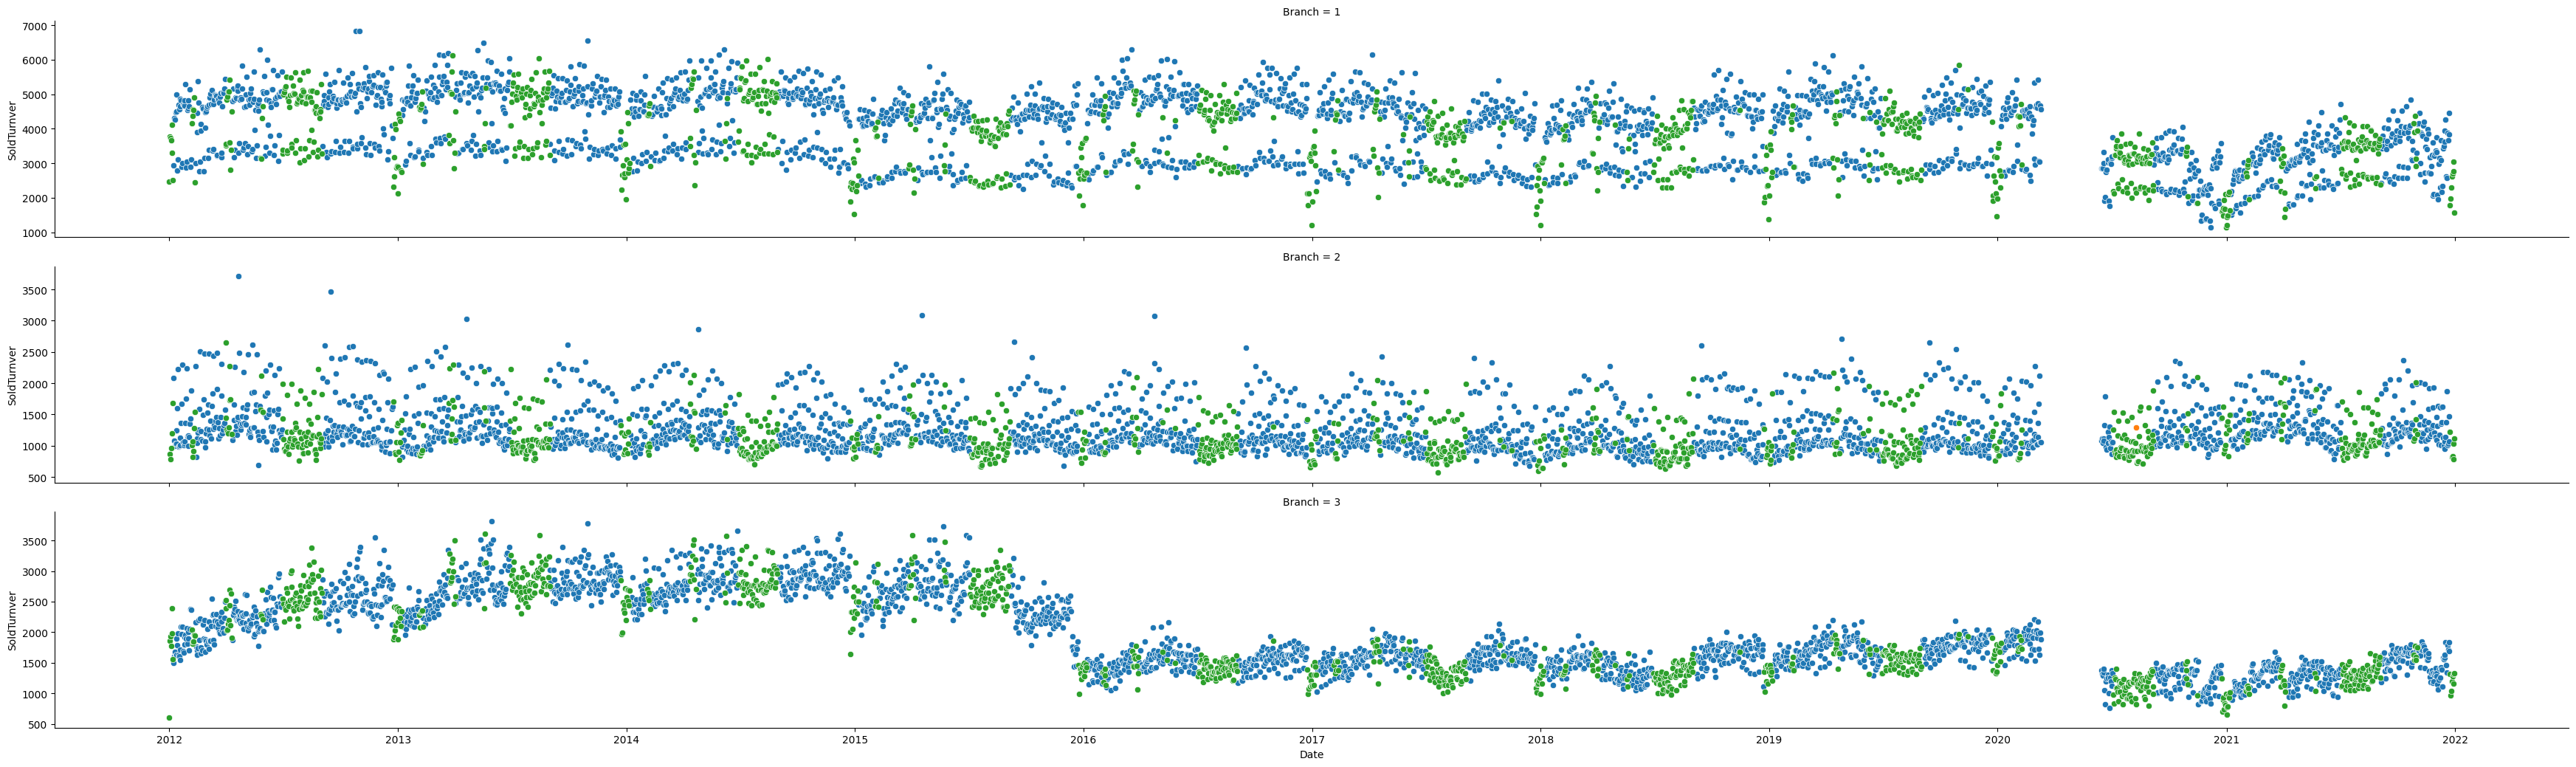

In [84]:
# plot with colours for school holidays
g = sns.FacetGrid(data=daily_sales, row="Branch", hue="school_holiday", sharey=False, height=3.5, aspect=10)
g.map(sns.scatterplot, "Date",  "SoldTurnver")
plt.savefig('plots/daily_sales.school_holidays.png');

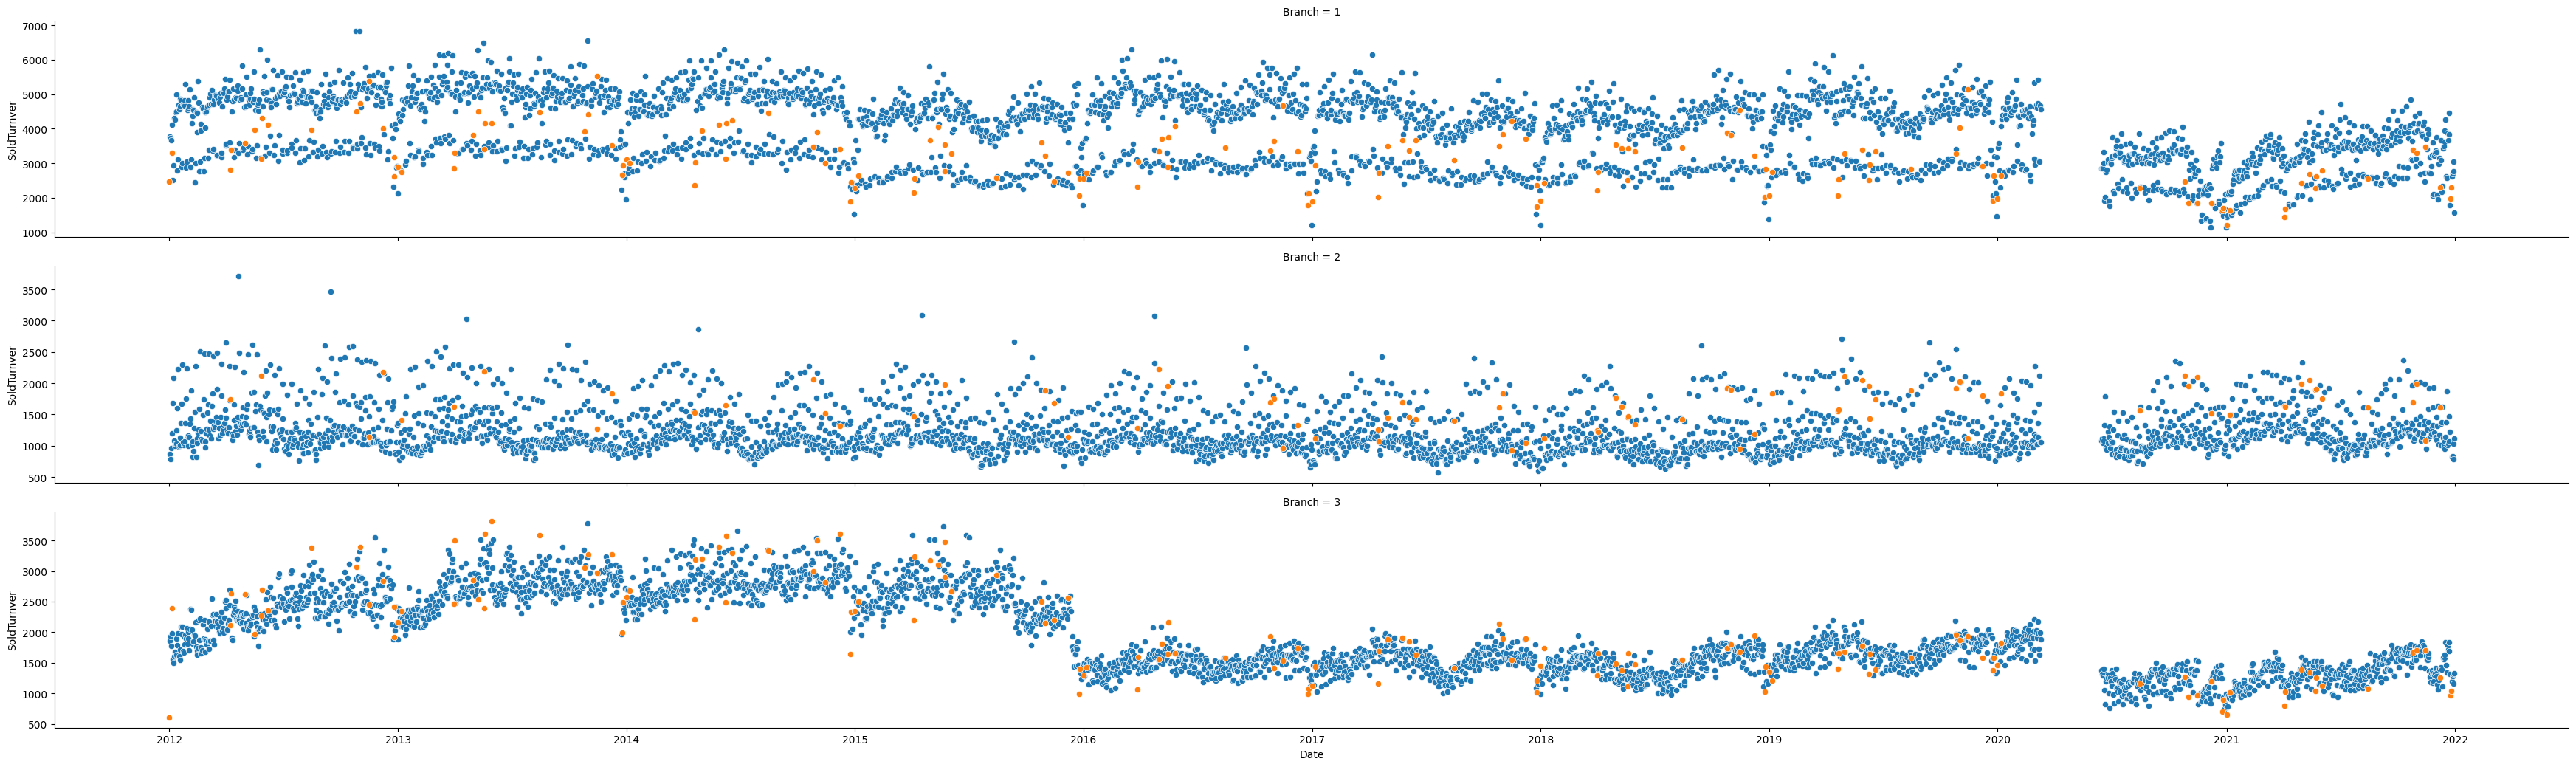

In [85]:
# plot with colours for public holidays
g = sns.FacetGrid(data=daily_sales, row="Branch", hue="public_holiday", sharey=False, height=3.5, aspect=10)
g.map(sns.scatterplot, "Date",  "SoldTurnver")
plt.savefig('plots/daily_sales.public_holidays.png');

In [86]:
# get dates one day before public holiday
import datetime
sales["bef_pub_hol"] = sales["Date"].isin(public_hols.Date - datetime.timedelta(days=1))
sales["bef_pub_hol"][sales["bef_pub_hol"] == True] = "bef_pub_hol"
sales["bef_pub_hol"][sales["public_holiday"] == True] = "pub_hol"

/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/3327306987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["bef_pub_hol"][sales["bef_pub_hol"] == True] = "bef_pub_hol"
/var/folders/jq/n1sfhk3x081brcshwchpd9640000gn/T/ipykernel_71527/3327306987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["bef_pub_hol"][sales["public_holiday"] == True] = "pub_hol"


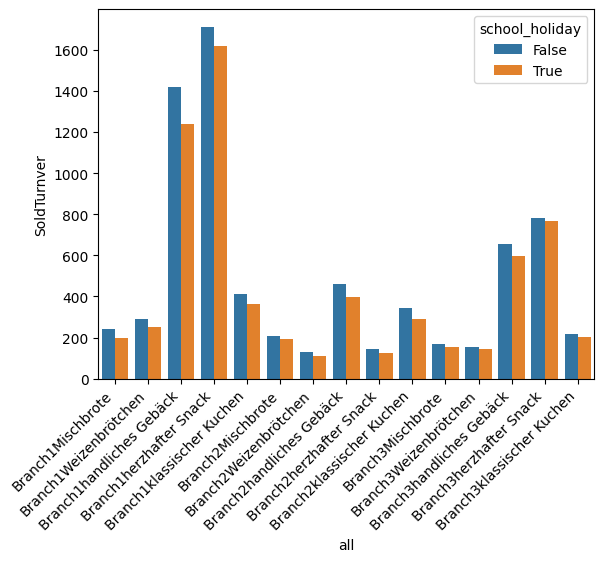

In [87]:
# summary school holidays
tmp = sales.groupby(["Branch", "PredictionGroupName", "school_holiday"])["SoldTurnver"].mean().reset_index()
tmp["all"] = "Branch" + tmp.Branch.astype("str") + tmp.PredictionGroupName
sns.barplot(data = tmp, x = "all", y = "SoldTurnver", hue = "school_holiday")
plt.xticks(rotation = 45, horizontalalignment="right");
plt.savefig("plots/school_holidays.summary.png")

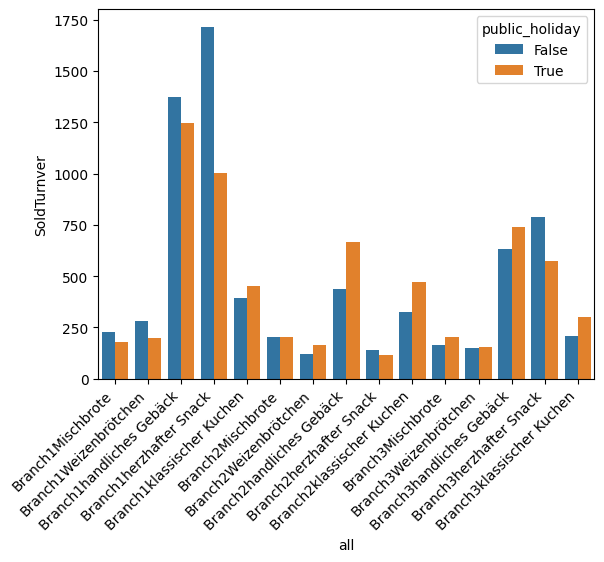

In [88]:
# summary public holidays
tmp = sales.groupby(["Branch", "PredictionGroupName", "public_holiday"])["SoldTurnver"].mean().reset_index()
tmp["all"] = "Branch" + tmp.Branch.astype("str") + tmp.PredictionGroupName
sns.barplot(data = tmp, x = "all", y="SoldTurnver", hue = "public_holiday")
plt.xticks(rotation = 45, horizontalalignment="right");
plt.savefig("plots/public_holidays.summary.png")

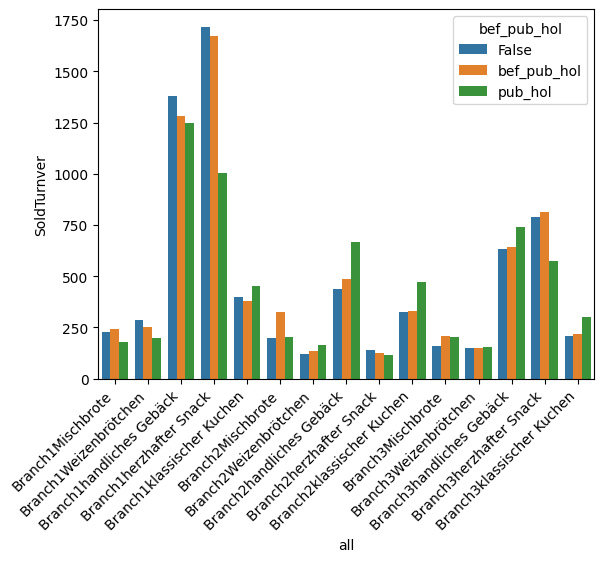

In [89]:
# summary public holidays
tmp = sales.groupby(["Branch", "PredictionGroupName", "bef_pub_hol"])["SoldTurnver"].mean().reset_index()
tmp["all"] = "Branch" + tmp.Branch.astype("str") + tmp.PredictionGroupName
sns.barplot(data = tmp, x = "all", y="SoldTurnver", hue = "bef_pub_hol") # confidence interval?
plt.xticks(rotation = 45, horizontalalignment="right");
#plt.savefig("plots/public_holidays.summary.png")